<a href="https://colab.research.google.com/github/nou321/PFE_Nour/blob/main/Lime_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model

In [9]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=aab0b11471d48f0964426f92be4ba10bde2e67a0e1e943a6b5e5d0a8cc1f1d64
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [10]:
from google.colab import drive
drive.mount('/content/drive')
sj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj'
nsj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj'

Mounted at /content/drive


In [11]:

image1=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/009.jpg")
image2=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/013.jpg")
image3=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/020.jpg")
img1=np.array(image1)
img2=np.array(image2)
img3=np.array(image3)

img_tensor1 = preprocessing.image.img_to_array(img1)
X1 = np.expand_dims(img_tensor1, axis=0)
img_tensor2 = preprocessing.image.img_to_array(img2)
X2 = np.expand_dims(img_tensor2, axis=0)
img_tensor3 = preprocessing.image.img_to_array(img3)
X3 = np.expand_dims(img_tensor3, axis=0)

image4=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/nsj_data/004.jpg")
image5=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/nsj_data/005.jpg")
image6=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/nsj_data/224.jpg")

img4=np.array(image4)
img5=np.array(image5)
img6=np.array(image6)
images=[img1,img2,img3,img4,img5,img6]
img_tensor4 = preprocessing.image.img_to_array(img4)
X4 = np.expand_dims(img_tensor4, axis=0)
img_tensor5 = preprocessing.image.img_to_array(img5)
X5 = np.expand_dims(img_tensor5, axis=0)
img_tensor6 = preprocessing.image.img_to_array(img6)
X6 = np.expand_dims(img_tensor6, axis=0)
Xs=[X1,X2,X3,X4,X5,X6]




In [12]:
image=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/019.jpg")
img=np.array(image)

In [13]:
X1.shape

(1, 512, 512, 1)

In [14]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ModelSjogren3splits.h5")


In [15]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer()


In [16]:
pred=model.predict(X1)
classe= np.where(pred>0.5,1.,0)
if(classe==1):
    r=np.argmax([0,0.8])
    print(r)
else : 
  r=np.argmax(classe)
  print(r)

1/1 [==============================] - 11s 11s/step
1


In [17]:
from skimage.color import rgb2gray,gray2rgb
def new_predict_fn(images):
    images=rgb2gray(images)
    images = np.expand_dims(images, axis=-1)
    pred=model.predict(images)
    classe= np.where(pred>0.5,1.,0)
    return classe

In [130]:
explanation = explainer.explain_instance(gray2rgb(img3),new_predict_fn, top_labels=2, hide_color=0, num_samples=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


In [20]:

from skimage.segmentation import mark_boundaries


In [132]:
explanation.top_labels

[0]

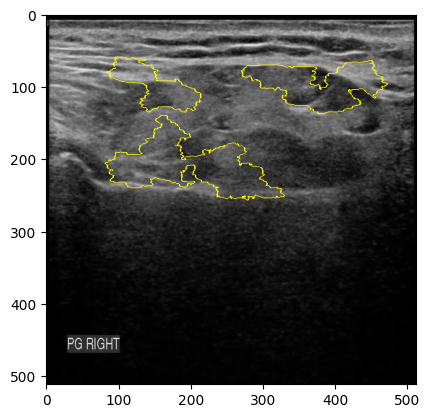

In [138]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

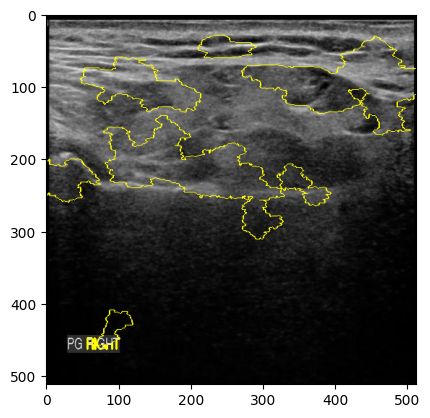

In [141]:
temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=30, hide_rest=False)
plt.imshow(mark_boundaries(temp1 , mask1))

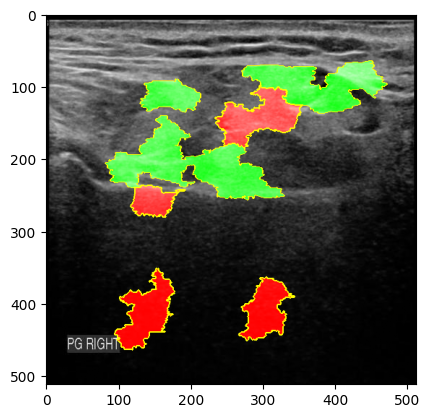

In [143]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=20 ,hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray, label2rgb 

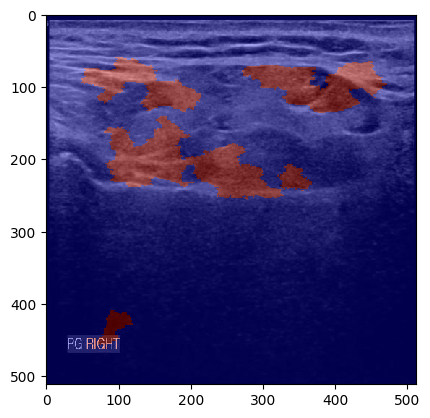

In [145]:
temp, mask = explanation.get_image_and_mask(0, positive_only=True, num_features=20, hide_rest=False, min_weight = 0.01)
plt.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')

# 2eme try

In [48]:
from lime import lime_image


from sklearn.linear_model import LinearRegression
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer1 = lime_image.LimeImageExplainer(verbose = False)
segmenter1 = SegmentationAlgorithm('quickshift', kernel_size=15,max_dist=200, ratio=0.05)

explanation1 = explainer1.explain_instance(gray2rgb(img),new_predict_fn,top_labels=10, hide_color=0, num_samples=10000,segmentation_fn=segmenter1)

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


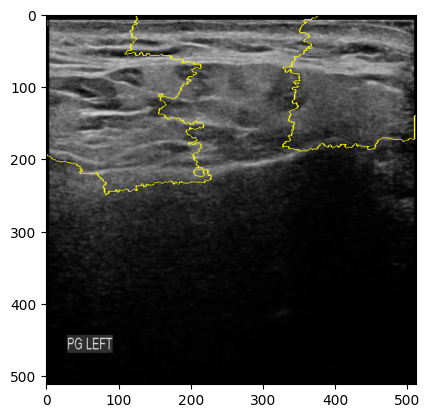

In [56]:
temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=True, num_features=100 ,hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

Text(0.5, 1.0, 'Positive/Negative Regions for 1')

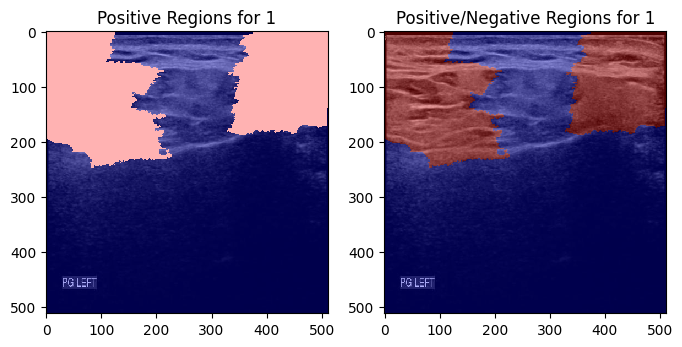

In [53]:
temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=False, num_features=100, hide_rest=False, min_weight = 0.01)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(1))
temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=True, num_features=100, hide_rest=False, min_weight = 0.01)
ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(1))

# AUTRE 

In [54]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer3 = lime_image.LimeImageExplainer()

In [65]:
segmenter3 = SegmentationAlgorithm('quickshift', kernel_size=10 ,max_dist=100, ratio=0.1)
explanation3 = explainer3.explain_instance(gray2rgb(img6),new_predict_fn,top_labels=2, hide_color=0, num_samples=10000,segmentation_fn=segmenter3)

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


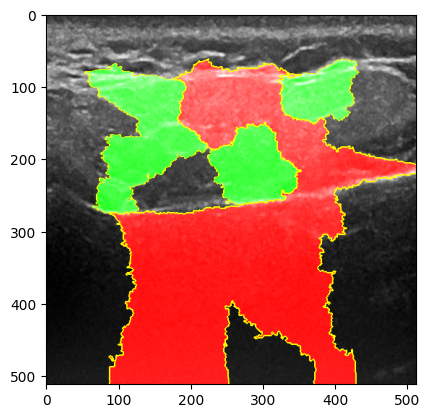

In [73]:
temp3, mask3 = explanation3.get_image_and_mask(explanation3.top_labels[0], positive_only=False, num_features=10 ,hide_rest=False)
plt.imshow(mark_boundaries(temp3, mask3))